In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm, genlaguerre
from scipy.constants import physical_constants

In [7]:
# Define the quantum numbers
n = 2
l = 1
m = 0

# Define the theta, phi, and r arrays
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
a0 = physical_constants['Bohr radius'][0]  # Bohr radius
r = np.linspace(0, 5*a0, 100)  # r values in the range of 0 to 5 times the Bohr radius

# Create a 3D grid for theta, phi, and r
theta, phi, r = np.meshgrid(theta, phi, r)

# Calculate the spherical harmonics
Y_lm = sph_harm(m, l, phi, theta)

# Define the radial function
def radial_func(r, n, l): 
    # Constants
    Z = 1  # Atomic number for hydrogen

    # Generalized Laguerre polynomial
    L = genlaguerre(n-l-1, 2*l+1)

    # Radial function
    R = np.sqrt((2*Z/n/a0)**3 * np.math.factorial(n-l-1) / (2*n*np.math.factorial(n+l))) * np.exp(-Z*r/n/a0) * (2*Z*r/n/a0)**l * L(2*Z*r/n/a0)

    return R

# Apply the radial function
R = radial_func(r, n, l)

# Calculate the total wavefunction
wavefunction = Y_lm

# Calculate the probability density
density = np.abs(wavefunction)**2

# Calculate the total probability of the wavefunction
total_prob = np.sum(density)

# Normalize the wavefunction
wavefunction_normalized = wavefunction / np.sqrt(total_prob)

# Now, if you calculate the density with the normalized wavefunction
density_normalized = np.abs(wavefunction_normalized)**2



# Convert to Cartesian coordinates for plotting
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)


C:\Users\natha\AppData\Local\Temp\ipykernel_39804\1988605996.py:27: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  R = np.sqrt((2*Z/n/a0)**3 * np.math.factorial(n-l-1) / (2*n*np.math.factorial(n+l))) * np.exp(-Z*r/n/a0) * (2*Z*r/n/a0)**l * L(2*Z*r/n/a0)


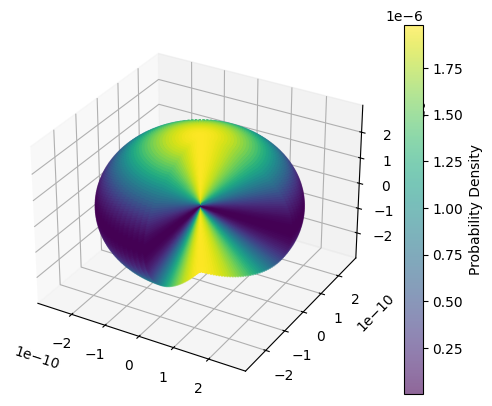

In [ ]:
# Create a mask for the slice
mask = (phi < 6*np.pi/4) | (phi > 8*np.pi/4)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[mask], y[mask], z[mask], c=density_normalized[mask], alpha=0.6, s=1)

# Add a colorbar
fig.colorbar(sc, ax=ax, label='Probability Density')

# Show the plot
plt.show()
